#**Desafío 9 - Boosting Classifiers**

*1 de noviembre de 2021*

##Francisca Pinto

###**Ejercicio 1 - Preprocesamiento**

1. Se importan las librerías necesarias y los archivos <code>.csv</code>.
2. Se graficarán las variables según sus características.

In [40]:
!pip install ipython-autotime

time: 3.15 s (started: 2021-11-02 00:21:15 +00:00)


In [41]:
#tiempo de ejecución
%load_ext autotime

#dataframe y arrays
import pandas as pd
import numpy as np

#estadística
import scipy.stats as stats

#gráficos

import matplotlib.pyplot as plt
import seaborn as sns

#gama matplotlib para facilitar escritura de código
%matplotlib inline

#separación entrenamiento validación
from sklearn.model_selection import train_test_split, GridSearchCV

#pipeline
from sklearn.pipeline import Pipeline

#métricas de clasificación
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score

#Árbol de decisión de clasificación
from sklearn.tree import DecisionTreeClassifier

#AdaBoost Clasiffier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 16.3 ms (started: 2021-11-02 00:21:18 +00:00)


In [42]:
#AUX: montar archivos y carpetas desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 5.04 ms (started: 2021-11-02 00:21:18 +00:00)


In [43]:
sns.set(font_scale = 0.7) #escalar fuente para acomodar a gráfico
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (5,5) #escalar gráficos
plt.rcParams["figure.dpi"] = 150 #DPI gráficos (también modifica tamaño)

time: 6.36 ms (started: 2021-11-02 00:21:18 +00:00)


In [44]:
colab_path1 = "/content/drive/MyDrive/ADL/3_Intro ML/Desafío 9 - Boosting/Apoyo Desafío - Boosting Classifiers/churn_train.csv"
colab_path2 = "/content/drive/MyDrive/ADL/3_Intro ML/Desafío 9 - Boosting/Apoyo Desafío - Boosting Classifiers/churn_test.csv"

df1 = pd.read_csv(colab_path1)
df2 = pd.read_csv(colab_path2)

df1.drop(columns = "Unnamed: 0", inplace = True)
df2.drop(columns = "Unnamed: 0", inplace = True)

random_seed = 3748

time: 39.8 ms (started: 2021-11-02 00:21:18 +00:00)


In [45]:
df1.iloc[:, 0:19]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


time: 72.3 ms (started: 2021-11-02 00:21:18 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


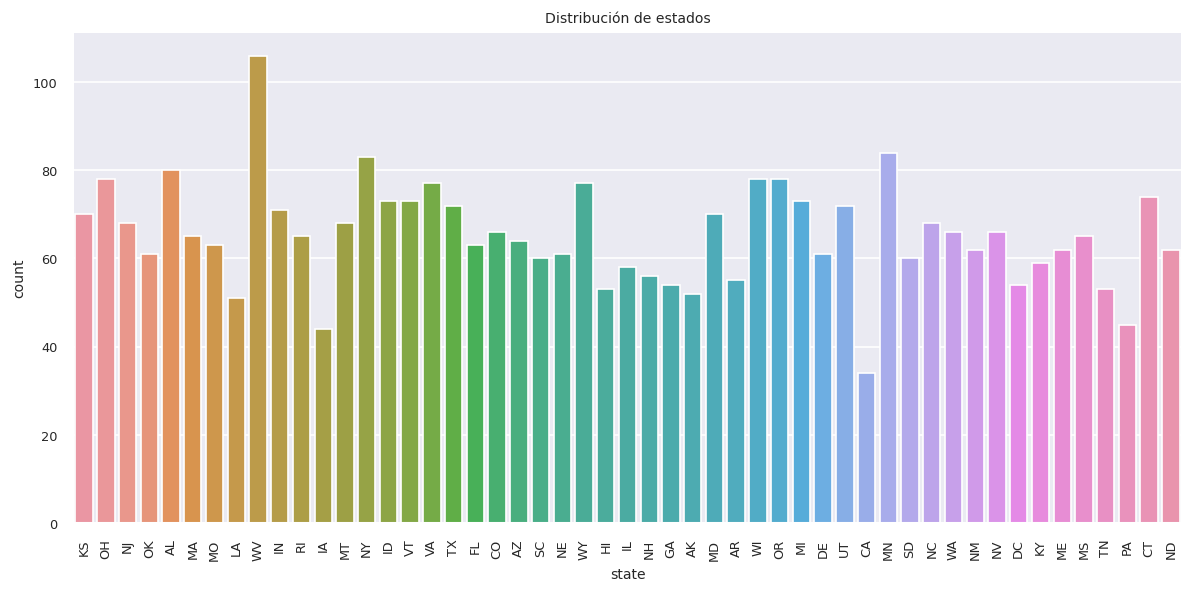

time: 2.28 s (started: 2021-11-02 00:21:18 +00:00)


In [46]:
sns.set(font_scale = 0.7) #escalar fuente para acomodar a gráfico
plt.rcParams["figure.figsize"] = (10, 5) #escalar gráficos
plt.rcParams["figure.dpi"] = 120 #DPI gráficos (también modifica tamaño)

ax = sns.countplot(df1["state"])
plt.xticks(rotation = 90)
plt.title(f"Distribución de estados")

plt.tight_layout()
plt.show()

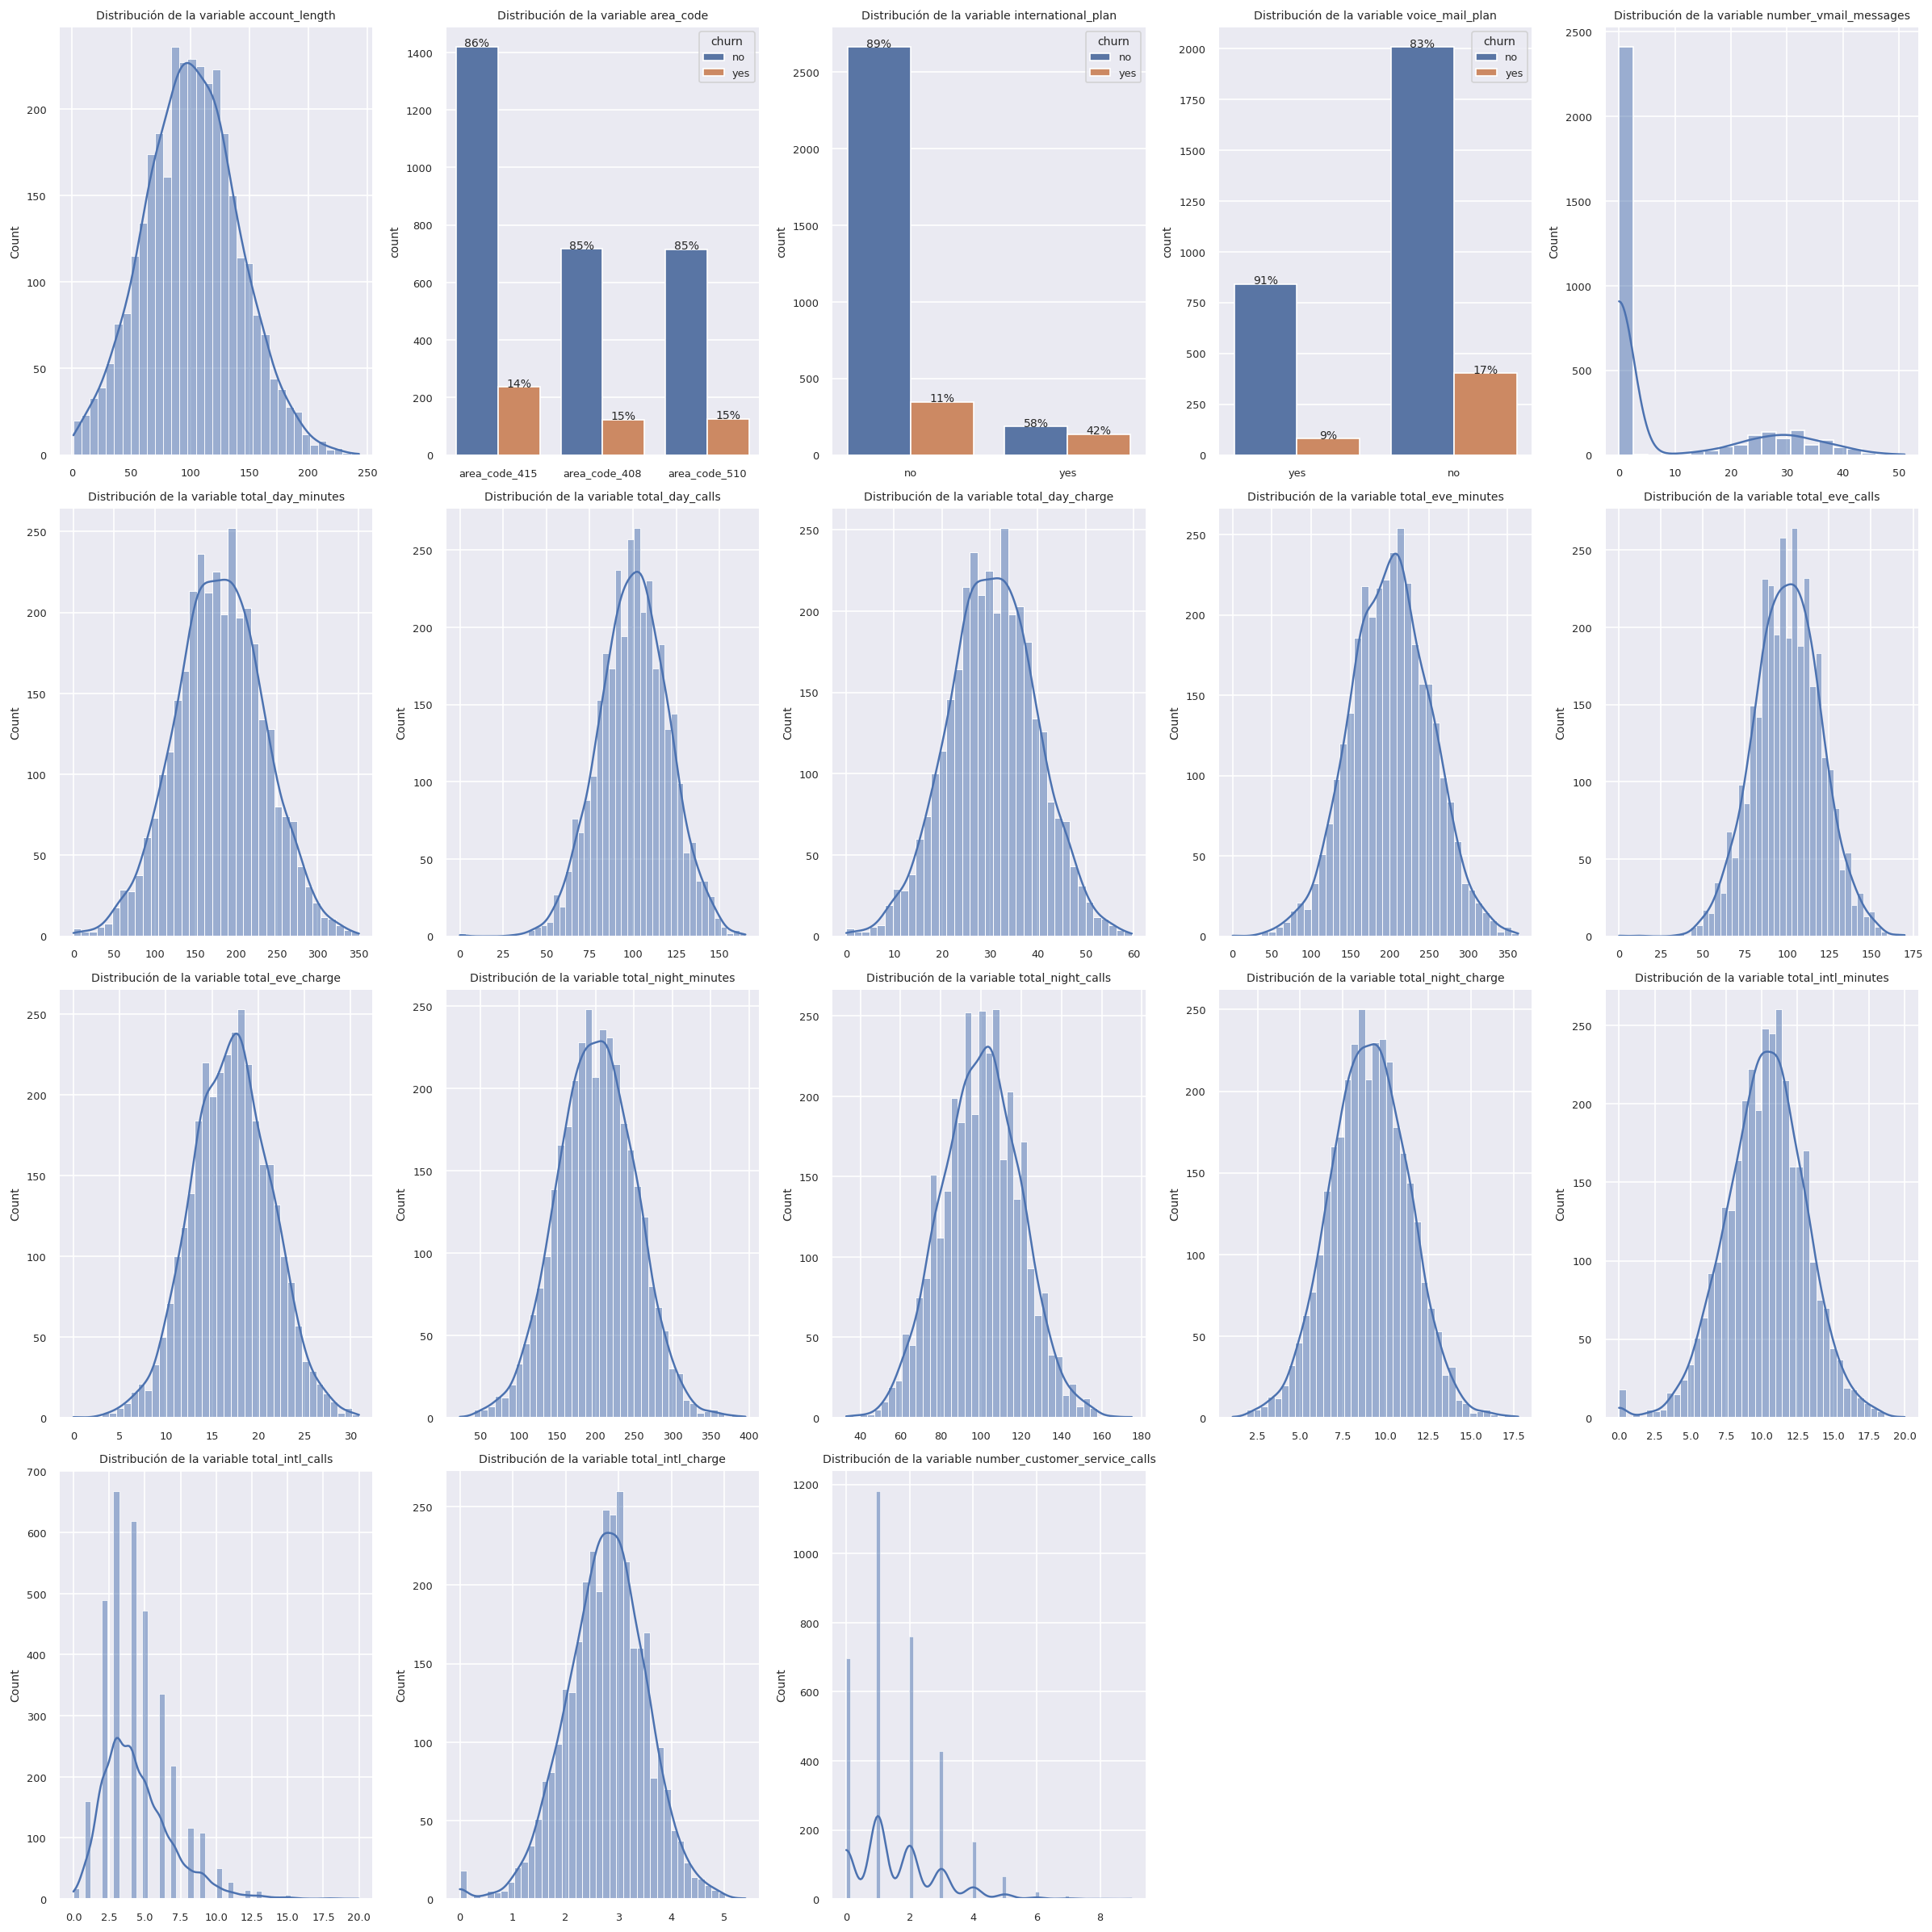

time: 21.3 s (started: 2021-11-02 00:21:21 +00:00)


In [47]:
sns.set(font_scale = 0.7)
plt.rcParams["figure.dpi"] = 120 #DPI gráficos
plt.rcParams["figure.figsize"] = (20, 20)    

for n, i in enumerate(df1.iloc[:, 1:19]):
  
  plt.subplot(4, 5, n+1)
  
  if len(df1[i].value_counts()) > 6:
    sns.histplot(df1[i], kde = True)
    plt.title(i)
    plt.xlabel("")

  else:
    ax = sns.countplot(x = df1[i], hue = df1["churn"])

    bars = ax.patches
    half = int(len(bars) / 2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
      height_l = left.get_height()
      height_r = right.get_height()
      total = height_l + height_r
  
      ax.text(left.get_x() + left.get_width() / 2.0, height_l + 1, "{0:.0%}".format(height_l / total), ha = "center")
      ax.text(right.get_x() + right.get_width() / 2.0, height_r + 1, "{0:.0%}".format(height_r / total), ha = "center")

  plt.title(f"Distribución de la variable {i}")
  plt.xlabel("")
  
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


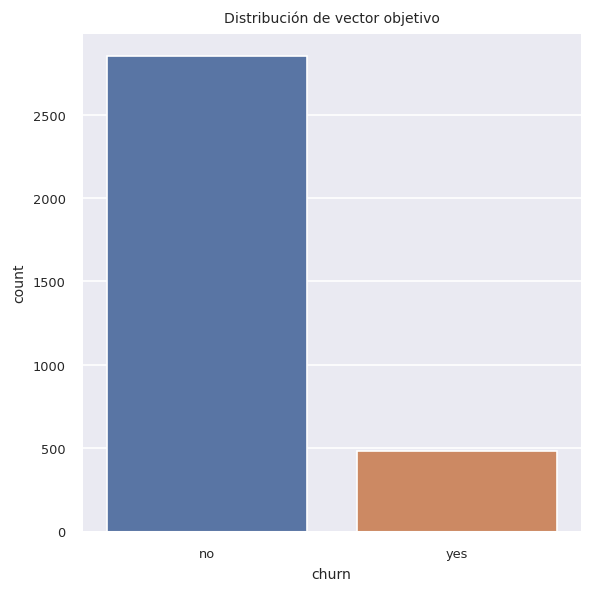

time: 343 ms (started: 2021-11-02 00:21:42 +00:00)


In [48]:
sns.set(font_scale = 0.7) #escalar fuente para acomodar a gráfico
plt.rcParams["figure.figsize"] = (5, 5) #escalar gráficos
plt.rcParams["figure.dpi"] = 120 #DPI gráficos (también modifica tamaño)

ax = sns.countplot(df1["churn"])
plt.title(f"Distribución de vector objetivo")

plt.tight_layout()
plt.show()

Comentarios:

1. Respecto a los atributosy variable objetivo:

- **States**: la distribución es pareja entre estados. El estado con mayor presencia es <code>Western Virginia</code>.

- **Grupo 1**, variables continuas: las variables <code>account_length</code>, <code>total_day_minutes</code>, <code>total_day_calls</code>, <code>total_day_charge</code>, <code>total_eve_minutes</code>, <code>total_eve_calls</code>, <code>total_eve_charge</code>, <code>total_night_minutes</code>, <code>total_night_calls</code>, <code>total_night_charge</code>, <code>total_intl_minutes</code> y <code>total_intl_charge</code> tienen distribuciones parejas, coherente con la naturaleza de las variables, que son minutos de llamadas y cargos asociados.

- **area_code**: la distribución está desequilibrada pero sigue los patrones del vector objetivo.

- **international_plan**: las llamadas del DataFrame son principalmente nacionales, y se observa una mayor proporción de fuga de clientes con uso de llamadas internacionales.

- **voice_mail_plan**: la mayoría de los clientes no tienen plan de buzón de voz contratado, y se observa que la proporción de fuga de clientes es menor en este segmento que en la totalidad del DataFrame.

- **number_vmail_messages**: la variable tiene un alto sesgo en valores 0, los clientes tienden a no tener mensajes de buzón de voz.

- **total_int_calls** y **number_customer_service_calls**: ambas variables discretas tienen un sesgo hacia números bajos en el eje X.

- **churn**: la variable objetivo tiene un desequilibrio importante, aproximadamente 1 de cada 6 registros es de clase "yes", representando un cliente que se ha cambiado de compañía.

2. Se crearán loops para re-codificar ambos DataFrame (<code>train</code> y <code>test</code>).

In [49]:
def df_preprocessing(dataframe):

  cols_log = ["number_vmail_messages"] #se deja como lista por si se cambia criterio, de momento es la única que se considera apta para modificar la escala
  cols_dummy_ohe = []
  cols_dummy_binary = []
  tmp = dataframe

  for i in cols_log:

    tmp[i] = tmp[i].apply(lambda x: np.log(x + 0.001)) #se utiliza criterio del apunte para modificar distribución y evitar 0

  for index, attribute in enumerate(tmp):

    if tmp[attribute].dtypes == "O":
      if len(tmp[attribute].value_counts()) > 2:
        cols_dummy_ohe.append(attribute)
      else:
        cols_dummy_binary.append(attribute)
    else:
      pass

  tmp = pd.get_dummies(data = tmp,
                      columns = cols_dummy_ohe) #drop_first = False por defecto

  tmp = pd.get_dummies(data = tmp,
                      columns = cols_dummy_binary,
                      drop_first = True)
  
  return tmp

time: 18.7 ms (started: 2021-11-02 00:21:42 +00:00)


Comentarios:

1. Se sobreescribirán ambos DataFrames, que ahora serán el resultado del preprocesamiento de la función creada.
2. Posteriormente se revisará uno de los DataFrame con <code>.info()</code> para revisar los tipos y cantidad de columnas.

In [50]:
df1 = df_preprocessing(df1)
df2 = df_preprocessing(df2)

time: 64.4 ms (started: 2021-11-02 00:21:43 +00:00)


In [51]:
df1.info(verbose = True,
         null_counts = True) #para verificar correcto procesamiento del DataFrame en la función

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3333 non-null   int64  
 1   number_vmail_messages          3333 non-null   float64
 2   total_day_minutes              3333 non-null   float64
 3   total_day_calls                3333 non-null   int64  
 4   total_day_charge               3333 non-null   float64
 5   total_eve_minutes              3333 non-null   float64
 6   total_eve_calls                3333 non-null   int64  
 7   total_eve_charge               3333 non-null   float64
 8   total_night_minutes            3333 non-null   float64
 9   total_night_calls              3333 non-null   int64  
 10  total_night_charge             3333 non-null   float64
 11  total_intl_minutes             3333 non-null   float64
 12  total_intl_calls               3333 non-null   i

Comentarios:

1. Se crean los conjuntos de entrenamiento y validación para entrenar los modelos y ajustar la grilla de hiperparámetros solicitada.
2. Se crean diccionarios con los hiperparámetros candidatos pada los modelos <code>Ada Boost</code> y <code>Gradient Boost</code>.
3. Se crean grillas con <code>GridSearchCV</code> para la búsqueda de la mejor combinación en cada caso, y posteriormente se imprime la mejor combinación con <code>.best_params_</code>.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns = "churn_yes"),
                                                    df1["churn_yes"],
                                                    test_size = 0.33,
                                                    random_state = random_seed)

time: 12.6 ms (started: 2021-11-02 00:21:43 +00:00)


In [53]:
model_aboost1_params = {"learning_rate" : [0.01, 0.1, 0.5],
                        "n_estimators" : [50, 100, 500, 1000, 2000]}
model_gboost1_params = {"learning_rate" : [0.01, 0.1, 0.5],
                        "n_estimators" : [50, 100, 500, 1000, 2000],
                        "subsample" : [0.1, 0.5, 0.9]}

model_aboost1_gridsearchcv = GridSearchCV(AdaBoostClassifier(),
                                          param_grid = model_aboost1_params,
                                          cv = 5,
                                          n_jobs = -1,
                                          verbose = 3).fit(X_train, y_train)
model_gboost1_gridsearchcv = GridSearchCV(GradientBoostingClassifier(),
                                          param_grid = model_gboost1_params,
                                          cv = 5,
                                          n_jobs = -1,
                                          verbose = 3).fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.1min finished


Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  7.9min finished


time: 12min 30s (started: 2021-11-02 00:21:43 +00:00)


Comentarios:

1. Ahora se imprimirán los parámetros de los mejores modelos en cada caso.
2. Se trabajará en paralelo con los mejores modelos <code>Ada Boost</code> y <code>Gradient Boost</code> para mostrar la importancia relativa de los atributos.

In [54]:
print("Modelo Ada Boost\n", "Parámetros del modelo: ", model_aboost1_gridsearchcv.best_params_, "\n----------\n")
print("Modelo Gradient Boost\n", "Parámetros del modelo: ", model_gboost1_gridsearchcv.best_params_, "\n----------")

Modelo Ada Boost
 Parámetros del modelo:  {'learning_rate': 0.1, 'n_estimators': 2000} 
----------

Modelo Gradient Boost
 Parámetros del modelo:  {'learning_rate': 0.01, 'n_estimators': 2000, 'subsample': 0.9} 
----------
time: 8.52 ms (started: 2021-11-02 00:34:13 +00:00)


Comentarios:

1. Respecto al modelo <code>Ada Boost</code>, se observa que el <code>learning_rate</code> es bastante bajo dentro del rango posible (<code>0</code> a <code>1</code>), mientras que <code>n_estimators</code> es el número máximo dentro del rango ingresado a la grilla. De haber tenido un mayor <code>n_estimators</code> incluso el <code>learning_rate</code> hubiera podido ser menor dado el <code>trade-off</code> entre ambos hiperparámetros.
2. En el caso de <code>Gradient Boost</code> el <code>learning_rate</code> es un décimo del mejor evaluado en <code>Ada Boost</code>, por lo que la ponderación que se le da a las iteraciones es muy baja. Se iguala la cantidad de <code>n_estimators</code> respecto al caso anterior. En el caso del hiperparámetro <code>subsample</code>, el mejor modelo encontrado por la grilla utiliza el <code>90%</code> de los datos en cada estimador entrenado.
3. Para ver la importancia relativa de los parámetros se partirá por generar los modelos, aplicar <code>.fit()</code> y posteriormente crear variables que guarden el <code>.feature_importances_</code> de cada uno.

In [55]:
aboost2 = AdaBoostClassifier(learning_rate = 0.1,
                             n_estimators = 2000,
                             random_state = random_seed)

model_aboost2 = aboost2.fit(X_train, y_train)

gboost2 = GradientBoostingClassifier(learning_rate = 0.01,
                                     n_estimators = 2000,
                                     subsample = 0.9,
                                     random_state = random_seed)
model_gboost2 = gboost2.fit(X_train, y_train)

yhat_aboost2 = model_aboost2.predict(X_test)
yhat_gboost2 = model_gboost2.predict(X_test)

time: 26.6 s (started: 2021-11-02 00:34:13 +00:00)


In [56]:
model_aboost2_feature_importances = model_aboost2.feature_importances_
model_gboost2_feature_importances = model_gboost2.feature_importances_

cols = df1.iloc[:, 0:71].columns

time: 87.8 ms (started: 2021-11-02 00:34:40 +00:00)


In [57]:
model_aboost2_feature_importances_df = pd.DataFrame(data = model_aboost2_feature_importances.reshape(1, 71),
                                                    columns = cols).T.rename(columns = {0 : "Importance"}).sort_values(by = "Importance", ascending = False)

model_gboost2_feature_importances_df = pd.DataFrame(data = model_gboost2_feature_importances.reshape(1, 71),
                                                    columns = cols).T.rename(columns = {0 : "Importance"}).sort_values(by = "Importance", ascending = False)

time: 10.7 ms (started: 2021-11-02 00:34:40 +00:00)


In [58]:
print("Modelo Ada Boost",
      "\n",
      f"ROC AUC SCORE: {round(roc_auc_score(y_test, yhat_aboost2), 3)}",
      "\n",
      f"Capacidad explicativa de los primeros 15 parámetros: ",
      round(model_aboost2_feature_importances_df.iloc[:15, :]["Importance"].sum()*100, 1),
      "%")
print("\n----------\n")
print("Modelo Gradient Boost",
      "\n",
      f"ROC AUC SCORE: {round(roc_auc_score(y_test, yhat_gboost2), 3)}",
      "\n",
      f"capacidad explicativa de los primeros 15 parámetros: ",
      round(model_gboost2_feature_importances_df.iloc[:15, :]["Importance"].sum()*100, 1),
      "%")
print("\n----------\n")

Modelo Ada Boost 
 ROC AUC SCORE: 0.666 
 Capacidad explicativa de los primeros 15 parámetros:  83.6 %

----------

Modelo Gradient Boost 
 ROC AUC SCORE: 0.847 
 capacidad explicativa de los primeros 15 parámetros:  95.2 %

----------

time: 17.6 ms (started: 2021-11-02 00:34:40 +00:00)


Comentarios:

1. Los <code>ROC AUC SCORE</code> de ambos modelos permiten concluir que, con los hiperparámetros elegidos, el modelo <code>Gradient Boost</code> tiene un comportamiento muy superior al modelo <code>Ada Boost</code>, por lo que se continuará solo con el primero.
2. Se dejarán los primeros 15 parámetros, que explican en el caso del modelo <code>Gradient Boost</code> un <code>95%</code> de la variabilidad del vector objetivo.

In [72]:
model_gboost2_feature_importances_df.iloc[ : 15 , : ]

,Importance
number_customer_service_calls,0.151637
total_day_charge,0.137074
total_day_minutes,0.136278
international_plan_yes,0.134595
total_eve_minutes,0.067198
total_eve_charge,0.059908
total_intl_calls,0.058908
number_vmail_messages,0.043101
voice_mail_plan_yes,0.036711
total_intl_minutes,0.032517


time: 15.3 ms (started: 2021-11-02 00:44:27 +00:00)


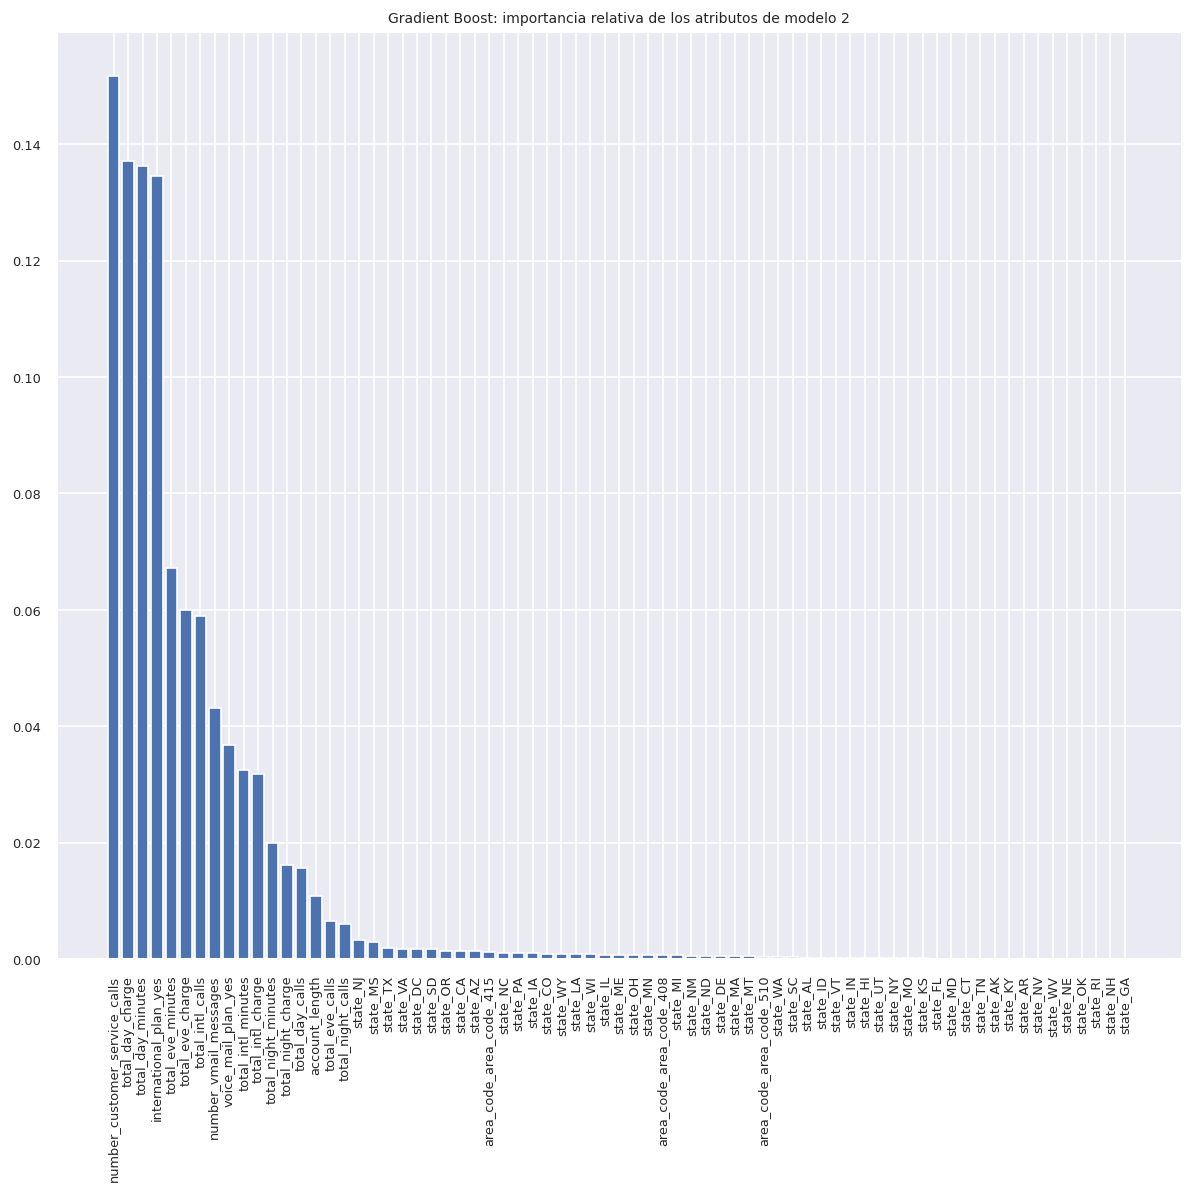

time: 4.12 s (started: 2021-11-02 00:34:40 +00:00)


In [60]:
sns.set(font_scale = 0.7)
plt.rcParams["figure.dpi"] = 120 #DPI gráficos
plt.rcParams["figure.figsize"] = (10, 10)

plt.bar(model_gboost2_feature_importances_df.index,
          model_gboost2_feature_importances_df["Importance"]);
plt.title("Gradient Boost: importancia relativa de los atributos de modelo 2")
plt.xticks(rotation = 90);

plt.tight_layout()
plt.show();

Comentarios:

1. Las primeras 15 variables que pueden explicar la variabilidad del vector objetivo, pueden agruparse del modo siguiente:

**contacto con Servicio al Cliente**: esta variable por sí sola (<code>number_customer_service_calls</code>) tiene la mayor capacidad explicativa de todo el DataFrame.

**variables horarias e internacionales**: existe un grupo de variables que describen el comportamiento de los clientes respecto al horario en el cual realizan sus llamadas (cantidad, minutos, cargos y si son llamadas internacionales o nacionales)

**variables voice mail**: grupo de variables relativa a la contratación de buzón de voz y a la cantidad de mensajes que tiene.

2. Otras variables, como el estado, están esparcidas según muestra el gráfico, no facilitando la interpretación al menos en estos formatos.

###**Ejercicio 4 - Probabilidad de fuga**

1. Se separará el DataFrame de <code>churn_test</code> en <code>X_test</code> y <code>y_test</code> con <code>train_test_split</code>.
2. Posteriormente se crea el vector predicho y se agrega en el DataFrame para poder ordenarlo según la cantidad de resultados positivos (<code>churn_yes = 1</code>).

In [61]:
X_test2, y_test2 = df2.drop(columns = "churn_yes"), df2["churn_yes"]

time: 13.5 ms (started: 2021-11-02 00:34:44 +00:00)


In [62]:
yhat2_gboost2 = model_gboost2.predict(X_test2)

time: 64.2 ms (started: 2021-11-02 00:34:44 +00:00)


In [63]:
yhat2_gboost2_dict = {"yhat" : yhat2_gboost2}

yhat2_gboost2_df = pd.DataFrame(yhat2_gboost2_dict)

df2_yhat = pd.merge(df2,
                    yhat2_gboost2_df,
                    left_index = True,
                    right_index = True,
                    how = "outer")

time: 14.6 ms (started: 2021-11-02 00:34:44 +00:00)


In [64]:
df2_yhat

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes,yhat
0,101,-6.907755,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,137,-6.907755,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,103,3.367330,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,99,-6.907755,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,108,-6.907755,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,50,3.688904,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1663,152,-6.907755,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1664,61,-6.907755,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1665,109,-6.907755,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


time: 151 ms (started: 2021-11-02 00:34:44 +00:00)


In [65]:
df2_yhat1_states = df2_yhat[df2_yhat["yhat"] == 1].loc[:, "state_AK":"state_WY"]


time: 13.6 ms (started: 2021-11-02 00:34:44 +00:00)


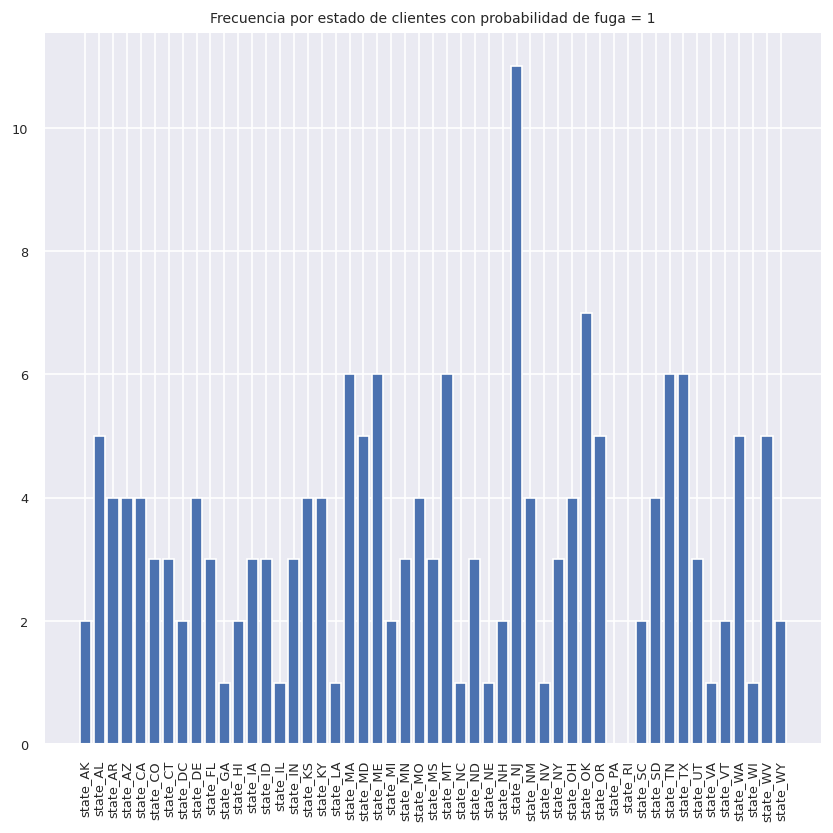

time: 2.91 s (started: 2021-11-02 00:34:44 +00:00)


In [66]:
sns.set(font_scale = 0.7)
plt.rcParams["figure.dpi"] = 120 #DPI gráficos
plt.rcParams["figure.figsize"] = (7, 7)

plt.bar(df2_yhat1_states.columns,
        df2_yhat1_states.sum());
plt.title("Frecuencia por estado de clientes con probabilidad de fuga = 1")
plt.xticks(rotation = 90);

plt.tight_layout()
plt.show();

Comentarios:

1. Estados con mayor probabilidad de fuga son:

* 1º lugar: <code>New Jersey</code>
* 2º lugar: <code>Oklahoma</code>
* 3º lugar: <code>Montana, Massachusetts, Maine, Tennessee, Texas</code>

2. En tercer lugar lo tienen 5 estados, y esto se da porque hay solo 170 valores en el vector predicho <code>churn = 1</code> por lo que son pocos respecto a la cantidad de información de prueba (cercano al 10%), por lo que se necesitarán más datos (si esta proporción es la normal) para poder revisar mejor qué estados tienen más problemas con los clientes.